In [1]:
%matplotlib inline

##Initialize SVC

In [1]:
from nilearn.input_data import NiftiMasker
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

ImportError: No module named nilearn.input_data

In [2]:
k = 500
feature_selection = SelectKBest(f_classif, k=k)
svc = SVC()
anova_svc = Pipeline([('anova', feature_selection), ('svc', svc)])

NameError: name 'SelectKBest' is not defined

In [46]:
anova_svc

Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f2c3c922de8>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

##Load Mask

In [47]:
import epi_prediction
white_matter = epi_prediction.SimpleMasker('masks/white.nii')

In [48]:
white_matter

<epi_prediction.SimpleMasker instance at 0x7f2c392e5bd8>

In [49]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_img

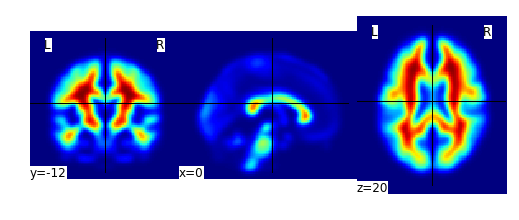

In [50]:
plot_img(white_matter._mask_image)
plt.show()

##Import Data

In [6]:
import epi_prediction
src_dir = '/home/lbuser/data/chuyu/process_normalize/'
control_filter = lambda file_name: 'CON' in file_name
patient_filter = lambda file_name: 'PAT' in file_name

In [7]:
epi_paths = epi_prediction.get_epi_paths(src_dir, patient_filter, control_filter)


In [8]:
fa_paths = epi_paths['fa']

In [9]:
fa_paths

cons    [/home/lbuser/data/chuyu/process_normalize/fa/...
pats    [/home/lbuser/data/chuyu/process_normalize/fa/...
Name: fa, dtype: object

In [56]:
mat = white_matter.transform_many(fa_paths['pats'] + fa_paths['cons'], verbose=True)

--------------------------------------------------------------------
####################################################################

In [57]:
mat.shape

(68, 302567)

In [58]:
labels = len(fa_paths['pats']) * [1] + len(fa_paths['cons']) * [0]

In [59]:
len(labels)

68

##Grid Search for Best Parameters of Gamma and C

In [90]:
from sklearn.metrics import f1_score, make_scorer
numRuns = 0
totalNum = len(C_range) * len(gamma_range) * n_folds

def verbose_f1(ground_truth, predictions):
    global numRuns
    numRuns = numRuns + 1
    print("{}: remaining".format(totalNum - numRuns))
    return f1_score(ground_truth, predictions)

In [91]:
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(svc__gamma=gamma_range, svc__C=C_range)
n_folds = np.floor_divide(32, 5)

cv = StratifiedKFold(labels, n_folds=n_folds)
grid = GridSearchCV(anova_svc, param_grid=param_grid, cv=cv, scoring = make_scorer(verbose_f1))

In [92]:
grid

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=6, shuffle=False, random_state=None),
       estimator=Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f2c3c922de8>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'svc__gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03]), 'svc__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
      

In [93]:
grid.fit(mat, labels)

1013: remaining
1012: remaining
1011: remaining
1010: remaining
1009: remaining
1008: remaining
1007: remaining
1006: remaining
1005: remaining
1004: remaining
1003: remaining
1002: remaining
1001: remaining
1000: remaining
999: remaining
998: remaining
997: remaining
996: remaining
995: remaining
994: remaining
993: remaining
992: remaining
991: remaining
990: remaining
989: remaining
988: remaining
987: remaining
986: remaining
985: remaining
984: remaining
983: remaining
982: remaining
981: remaining
980: remaining
979: remaining
978: remaining
977: remaining
976: remaining
975: remaining
974: remaining
973: remaining
972: remaining
971: remaining
970: remaining
969: remaining
968: remaining
967: remaining
966: remaining
965: remaining
964: remaining
963: remaining
962: remaining
961: remaining
960: remaining
959: remaining
958: remaining
957: remaining
956: remaining
955: remaining
954: remaining
953: remaining
952: remaining
951: remaining
950: remaining
949: remaining
948: remain

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=6, shuffle=False, random_state=None),
       estimator=Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f2c3c922de8>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'svc__gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03]), 'svc__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
      

In [94]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))
scores

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.20360644,  0.50424837,  0.51794937,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.20360644,  0.52670826,  0.48445378,  0.59605395,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.25752801,  0.54542484,  0.47358034,  0.50255333,  0.59605395,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.      

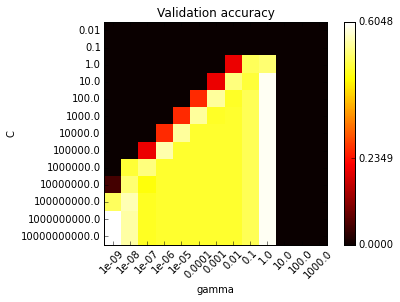

In [95]:
cax = plt.imshow(scores, interpolation="nearest", cmap=plt.cm.hot)
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.xlabel('gamma')
plt.yticks(np.arange(len(C_range)), C_range)
plt.ylabel('C')
plt.title('Validation accuracy')

cbar = plt.colorbar(cax, ticks=[np.min(scores), np.mean(scores), np.max(scores)])

plt.show()

In [96]:
scores.shape

(13, 13)

In [105]:
np.max(scores)

0.60483617689500035

##Try with Thresholded White Matter Mask

In [69]:
import epi_prediction

In [70]:
white_matter = epi_prediction.SimpleMasker('masks/white.nii', threshold=.2)

In [71]:
mat = white_matter.transform_many(fa_paths['pats'] + fa_paths['cons'], verbose=True)

--------------------------------------------------------------------
####################################################################

In [72]:
labels = len(fa_paths['pats']) * [1] + len(fa_paths['cons']) * [0]

In [73]:
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(svc__gamma=gamma_range, svc__C=C_range)
n_folds = np.floor_divide(32, 5)

cv = StratifiedKFold(labels, n_folds=n_folds)

In [74]:
grid = GridSearchCV(anova_svc, param_grid=param_grid, cv=cv, 
                    scoring = epi_prediction.verbose_scorer(n_folds * len(gamma_range) * len(C_range)))
grid.fit(mat, labels)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=6, shuffle=False, random_state=None),
       estimator=Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f6592b36de8>)), ('svc', SVC(C=1000000000.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=9.9999999999999995e-08, kernel='rbf', max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'svc__gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03]), 'svc__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
 

In [75]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))
scores

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.18522409,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.44520626,  0.68703845,  0.6481352 ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.42836134,  0.68703845,  0.57834225,  0.6481352 ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.42836134,  0.64081996,  0.55775401,  0.57647059,  0.6481352 ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.      

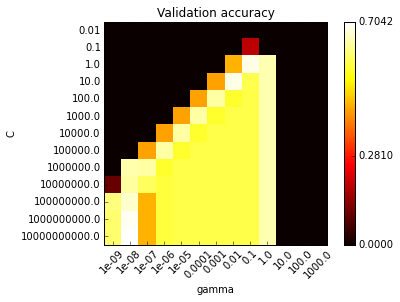

In [76]:
cax = plt.imshow(scores, interpolation="nearest", cmap=plt.cm.hot)
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.xlabel('gamma')
plt.yticks(np.arange(len(C_range)), C_range)
plt.ylabel('C')
plt.title('Validation accuracy')

cbar = plt.colorbar(cax, ticks=[np.min(scores), np.mean(scores), np.max(scores)])

plt.show()

##Generate Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix

In [91]:
#take values from Grid CV search
gamma = gamma_range[1]
C = C_range[12]
anova_svc.set_params(svc__C=C, svc__gamma=gamma)
scores[12][1]

0.70416397328162028

In [92]:
cv = StratifiedKFold(labels, n_folds=n_folds)

labels_arr = np.array(labels)

cv_info, cv_info_train = epi_prediction.verbose_cv(mat, labels_arr, anova_svc, n_folds=6)

train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict


In [93]:
cv_info

f1 scores: [0.8571428571428571, 0.59999999999999998, 0.76923076923076927, 0.54545454545454541, 0.83333333333333326, 0.61538461538461542]
avg f1 score: 0.703424353424
precision scores: [0.75, 0.75, 0.625, 0.5, 0.7142857142857143, 0.5]
avg precision score: 0.639880952381
recall scores: [1.0, 0.5, 1.0, 0.59999999999999998, 1.0, 0.80000000000000004]
avg recall score: 0.816666666667
root-mean-square-error scores: [0.408248290463863, 0.5773502691896257, 0.5222329678670935, 0.674199862463242, 0.4264014327112209, 0.674199862463242]
avg root-mean-square-error: 0.547105447526

In [94]:
cv_info.confusion_matrix()

array([[21, 15],
       [ 6, 26]])

In [95]:
cv_info.normalized_confusion_matrix()

array([[ 0.58333333,  0.41666667],
       [ 0.1875    ,  0.8125    ]])

##Try With Leave Out

In [96]:
cv = StratifiedKFold(labels, n_folds=n_folds)

labels_arr = np.array(labels)

cv_info_1_out, cv_info_train_1_out = epi_prediction.verbose_cv(mat, 
                                                   labels_arr, 
                                                   anova_svc,
                                                   n_folds=31,
                                                   verbose=False)

####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####
####


In [97]:
cv_info_1_out.confusion_matrix()

array([[26, 10],
       [10, 22]])

In [98]:
cv_info_1_out.normalized_confusion_matrix()

array([[ 0.72222222,  0.27777778],
       [ 0.3125    ,  0.6875    ]])

In [99]:
cv_info_1_out.avg_f1_score()

0.59139784946236551

In [100]:
cv_info.avg_f1_score()

0.7034243534243535

##Use Linear to Obtain Coefficients

In [102]:
anova_svc_lin = Pipeline( [('anova', SelectKBest(k=500)), ('svc', SVC())] )
anova_svc_lin.set_params(svc__kernel='linear')

Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f6592b36de8>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [103]:
C_range_lin = np.logspace(-3, 3, 7)

total_runs = len(C_range_lin) * n_folds

scorer = epi_prediction.verbose_scorer(total_runs)
grid_lin = GridSearchCV(anova_svc_lin, param_grid={"svc__C": C_range_lin}, cv=cv, scoring = scorer)

grid_lin.fit(mat, labels_arr)

------------------------------------------
##########################################

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=6, shuffle=False, random_state=None),
       estimator=Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f6592b36de8>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'svc__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(verbose_score_fn), verbose=0)

In [104]:
grid_lin.grid_scores_

[mean: 0.00000, std: 0.00000, params: {'svc__C': 0.001},
 mean: 0.08088, std: 0.18634, params: {'svc__C': 0.01},
 mean: 0.68704, std: 0.20851, params: {'svc__C': 0.10000000000000001},
 mean: 0.66524, std: 0.32298, params: {'svc__C': 1.0},
 mean: 0.57647, std: 0.29321, params: {'svc__C': 10.0},
 mean: 0.57647, std: 0.29321, params: {'svc__C': 100.0},
 mean: 0.57647, std: 0.29321, params: {'svc__C': 1000.0}]

In [105]:
anova_svc_lin.set_params(svc__C=.1)

Pipeline(steps=[('anova', SelectKBest(k=500, score_func=<function f_classif at 0x7f6592b36de8>)), ('svc', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [109]:
coeffs = np.zeros(white_matter._mask_image.shape)
anova = anova_svc_lin.named_steps['anova']
for train, test in cv:
    expected = labels_arr[test]
    anova_svc_lin.fit(mat[train], labels_arr[train])
    coeffs = coeffs + np.abs(white_matter.inv_transform(anova.inverse_transform(svc.coef_)))

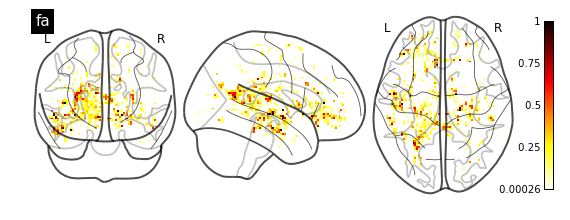

In [112]:
import nibabel as nib

from nilearn.plotting import plot_glass_brain
coeffs_normalized = coeffs/np.max(coeffs)
plot_glass_brain(nib.Nifti1Image(coeffs_normalized, 
                                 affine = white_matter._mask_image.get_affine()), 
                 title="fa",
                 colorbar=True)

###Generate Confusion Matrix Linear

In [114]:
labels_arr = np.array(labels)

cv_info_lin, cv_info_train_lin = epi_prediction.verbose_cv(mat, labels_arr, anova_svc_lin, n_folds=6)

train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict
####
train labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test labels
[1 1 1 1 1 0 0 0 0 0 0]
about to fit
about to predict


In [123]:
cv_info_lin.confusion_matrix()

array([[28,  8],
       [10, 22]])

In [122]:
cv_info_lin.normalized_confusion_matrix()

array([[ 0.77777778,  0.22222222],
       [ 0.3125    ,  0.6875    ]])

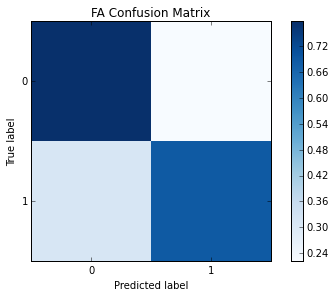

In [121]:
epi_prediction.plot_confusion_matrix(cv_info_lin.normalized_confusion_matrix(), title="FA Confusion Matrix")

In [119]:
cv_info.avg_f1_score()

0.7034243534243535

In [120]:
cv_info_lin.avg_f1_score()

0.6839826839826838